In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np


In [3]:
# Load dataset from GitHub URL
url = 'https://raw.githubusercontent.com/intern2grow/sales-data-analysis/7b25e869609db778c1430cb931423796ad9895a2/sales_data.csv'
df = pd.read_csv(url)

# Rename columns
df.rename(columns={'sales': 'quantity', 'date': 'Date'}, inplace=True)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Ensure data is sorted by date
df = df.sort_values(by='Date')

# Set 'Date' column as the index
df.set_index('Date', inplace=True)


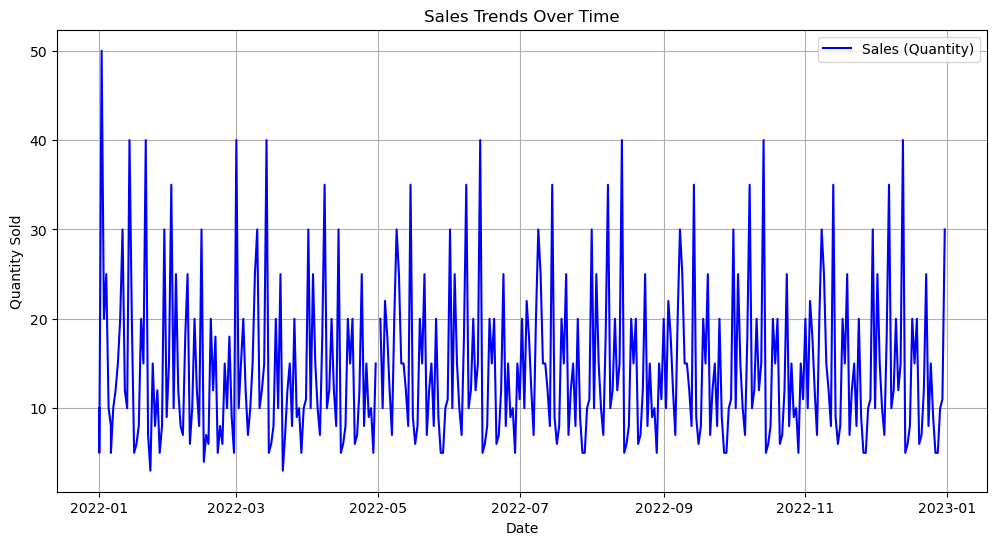

In [5]:
# Plot the sales data (Quantity) over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['quantity'], label='Sales (Quantity)', color='b')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from GitHub
url = 'https://raw.githubusercontent.com/intern2grow/sales-data-analysis/7b25e869609db778c1430cb931423796ad9895a2/sales_data.csv'
df = pd.read_csv(url)

# Check the first few rows of the dataset and the column names
print(df.head())
print(df.columns)

# Assuming the date column is named 'Order Date' (adjust as needed based on the result of the previous check)
df = pd.read_csv(url, parse_dates=['Order Date'], index_col='Order Date')

# Ensure data is sorted by date
df = df.sort_index()

# Visualize the sales trends using 'Quantity' column for sales
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Quantity'], label='Sales (Quantity)', color='b')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales (Quantity)')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Add moving average to smooth the data (window size can be adjusted)
df['Moving_Avg'] = df['Quantity'].rolling(window=7).mean()
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Quantity'], label='Sales (Quantity)', color='b')
plt.plot(df.index, df['Moving_Avg'], label='Moving Average', color='orange', linestyle='--')
plt.title('Sales Trends with Moving Average')
plt.xlabel('Date')
plt.ylabel('Sales (Quantity)')
plt.legend()
plt.grid(True)
plt.show()


         date     product     category   price  quantity  revenue
0  2022-01-01  Smartphone  Electronics   600.0      10.0   6000.0
1  2022-01-01      Laptop  Electronics  1200.0       5.0   6000.0
2  2022-01-02     T-Shirt     Clothing    20.0      50.0   1000.0
3  2022-01-03  Headphones  Electronics   100.0      20.0   2000.0
4  2022-01-04     T-Shirt     Clothing    20.0      25.0    500.0
Index(['date', 'product', 'category', 'price', 'quantity', 'revenue'], dtype='object')


ValueError: Missing column provided to 'parse_dates': 'Order Date'

In [15]:
# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'Root Mean Squared Error (RMSE): {rmse}')


Root Mean Squared Error (RMSE): 8.057585931687635


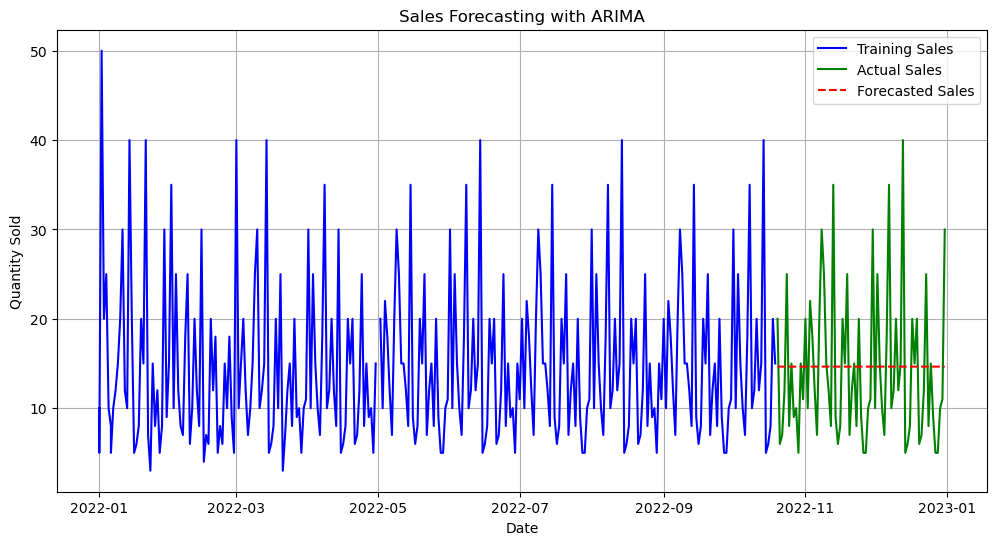

In [17]:
# Visualize actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Sales', color='b')
plt.plot(test.index, test, label='Actual Sales', color='g')
plt.plot(forecast_index, forecast, label='Forecasted Sales', color='r', linestyle='--')
plt.title('Sales Forecasting with ARIMA')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
# Save forecasted values to a DataFrame
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'Forecasted_Quantity': forecast
})

# Optionally, export forecasted values to a CSV file
forecast_df.to_csv('forecasted_sales.csv', index=False)
print(forecast_df.head())


          Date  Forecasted_Quantity
295 2022-10-20            14.629373
296 2022-10-21            14.651531
297 2022-10-22            14.650206
298 2022-10-23            14.650285
299 2022-10-24            14.650281
